In [2]:
import pandas as pd
import seaborn as sns

In [3]:
no_machine_path = r'new_results\no_machines.txt'
sdata_normal_path = r'new_results\normal.txt'
worker_path = r'new_results\workers_corrected.txt'
worker_10_min_path = r'new_results\workers_all_10_min.txt'

In [4]:
benchmark_base_path = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\upgrades\code\benchmarks\\'

def read_benchmark_file(source, instance):
    if source.startswith('0'):
        target_file = f'0_BehnkeGeiger\Behnke{instance}.fjs'
    elif source.startswith('1'):
        target_file = f'1_Brandimarte\BrandimarteMk{instance}.fjs'
    elif source.startswith('2a'):
        target_file = f'2a_Hurink_sdata\HurinkSdata{instance}.fjs'
    elif source.startswith('2b'):
        target_file = f'2b_Hurink_edata\HurinkEdata{instance}.fjs'
    elif source.startswith('2c'):
        target_file = f'2c_Hurink_rdata\HurinkRdata{instance}.fjs'
    elif source.startswith('2d'):
        target_file = f'2d_Hurink_vdata\HurinkVdata{instance}.fjs'
    elif source.startswith('3'):
        target_file = f'3_DPpaulli\DPpaulli{instance}.fjs'
    elif source.startswith('4'):
        target_file = f'4_ChambersBarnes\ChambersBarnes{instance}.fjs'
    elif source.startswith('5'):
        target_file = f'5_Kacem\Kacem{instance}.fjs'
    elif source.startswith('6'):
        target_file = f'6_Fattahi\Fattahi{instance}.fjs'
    path = benchmark_base_path + f'{target_file}'
    return open(path, 'r').readlines()

In [5]:
def read_data(path :  str) -> list[dict]:
    file_content = []
    data = []
    data_as_dict = dict()
    result = []
    with open(path, 'r') as f:
        file_content = f.readlines()
        all_data = [x.split(';') for x in file_content]
        for data in all_data:
            if data[0].startswith('Error'):
                pass
            else:
                data_as_dict = dict()
                data_as_dict['source'] = data[0]
                data_as_dict['instance'] = int(data[1])
                data_as_dict['fitness'] = int(float(data[2]) + 0.5)
                data_as_dict['ub'] = float(data[3])
                data_as_dict['lb'] = float(data[4])
                data_as_dict['gap'] = float(data[5])
                data_as_dict['status'] = 'optimal' if int(data[6]) == 2 else 'out_of_time'
                data_as_dict['n_explored'] = int(float(data[7]))
                data_as_dict['optimization_time'] = float(data[8])
                data_as_dict['overall_time'] = float(data[9])
                benchmark_data = read_benchmark_file(data_as_dict['source'], data_as_dict['instance'])
                benchmark_system = benchmark_data[0].split(' ')
                data_as_dict['n_machines'] = int(benchmark_system[1])
                data_as_dict['n_jobs'] = int(benchmark_system[0])
                data_as_dict['average_workstations_per_operation'] = float(benchmark_system[2])
                jobs = benchmark_data[1:]
                data_as_dict['n_operations'] = sum([int(x.split(' ')[0]) for x in jobs])
                data_as_dict['average_operations_per_job'] = data_as_dict['n_operations'] / data_as_dict['n_jobs']
                data_as_dict['beta_flexibility'] = data_as_dict['average_workstations_per_operation']/data_as_dict['n_machines']
                # ignore actual solution data for now
                result.append(data_as_dict)
    return result

In [6]:
fixed_assignments_data = read_data(no_machine_path)
sdata_normal_data = read_data(sdata_normal_path)
worker_data = read_data(worker_path)
worker_10_min_data = read_data(worker_10_min_path)

In [7]:
fixed_assignments_df = pd.DataFrame(fixed_assignments_data)
sdata_df = pd.DataFrame(sdata_normal_data)
worker_df = pd.DataFrame(worker_data)
worker_10_min_df = pd.DataFrame(worker_10_min_data)

In [8]:
fixed_assignments_df.head(0)

,source,instance,fitness,ub,lb,gap,status,n_explored,optimization_time,overall_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility


### Compare Gurobi with fixed assignments to normal Gurobi model

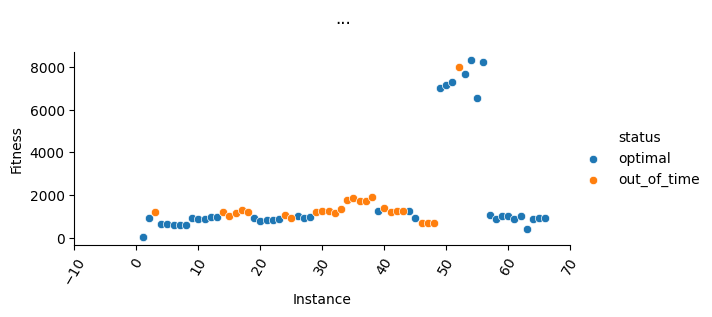

In [9]:
fg = sns.FacetGrid(data=fixed_assignments_df, hue='status', aspect=2)
fg.fig.suptitle("...")
fg.map_dataframe(sns.scatterplot, x='instance', y='fitness').add_legend().set_xticklabels(rotation=60)
fg.set_ylabels('Fitness')
fg.set_xlabels('Instance')

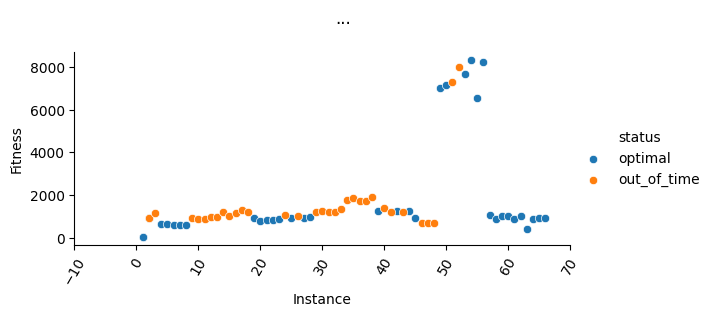

In [10]:
fg = sns.FacetGrid(data=sdata_df, hue='status', aspect=2)
fg.fig.suptitle("...")
fg.map_dataframe(sns.scatterplot, x='instance', y='fitness').add_legend().set_xticklabels(rotation=60)
fg.set_ylabels('Fitness')
fg.set_xlabels('Instance')

[Text(0.5, 1.0, 'Fitness Comparison')]

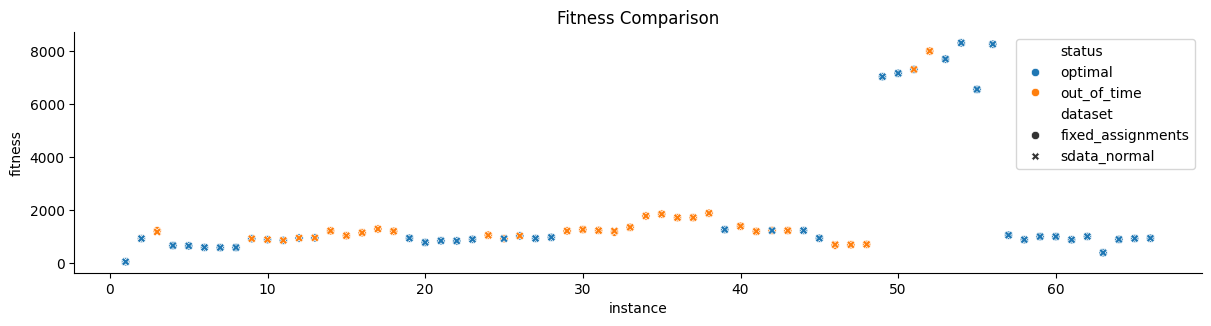

In [11]:
concatenated = pd.concat([fixed_assignments_df.assign(dataset='fixed_assignments'), sdata_df.assign(dataset='sdata_normal')])
fg = sns.FacetGrid(data=concatenated, aspect=4)
sns.scatterplot(x='instance', y='fitness', data=concatenated, hue='status', style='dataset').set(title='Fitness Comparison')

[Text(0.5, 1.0, 'Runtime Comparison')]

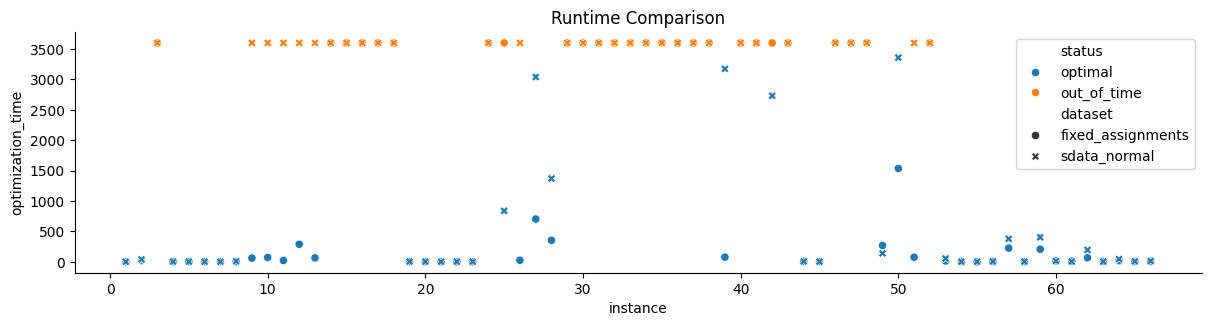

In [12]:
fg = sns.FacetGrid(data=concatenated, aspect=4)
sns.scatterplot(x='instance', y='optimization_time', data=concatenated, hue='status', style='dataset').set(title='Runtime Comparison')

[Text(0.5, 1.0, 'Overall Time Comparison')]

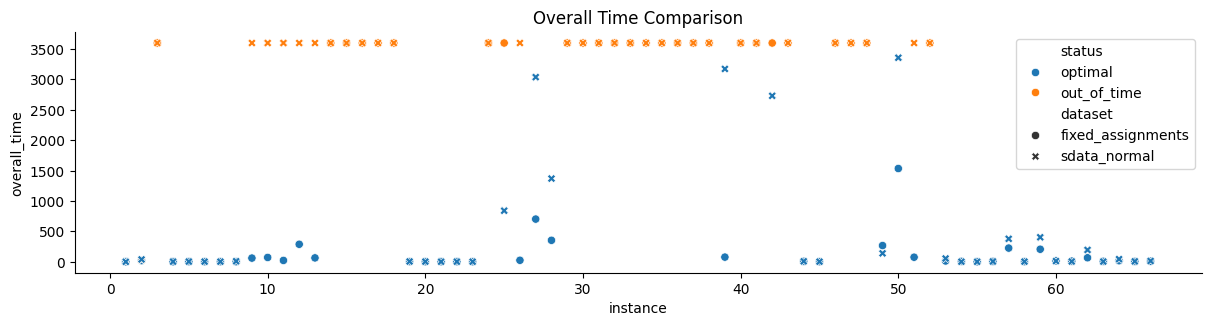

In [13]:
fg = sns.FacetGrid(data=concatenated, aspect=4)
sns.scatterplot(x='instance', y='overall_time', data=concatenated, hue='status', style='dataset').set(title='Overall Time Comparison')

[Text(0.5, 1.0, 'Gap Comparison')]

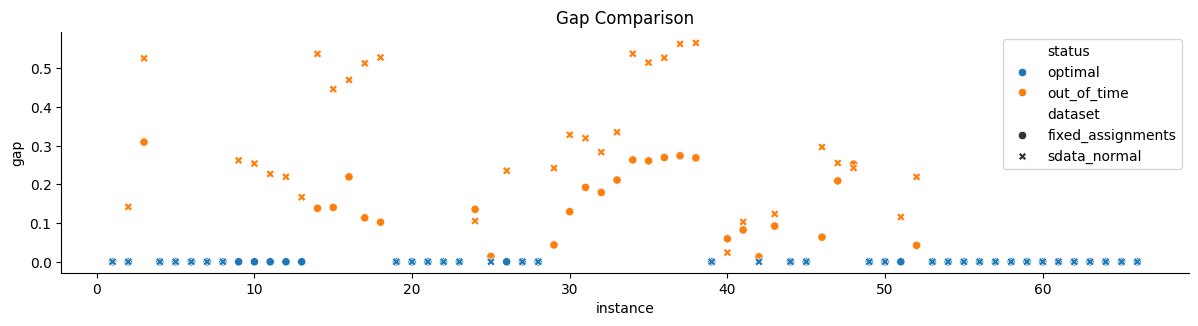

In [14]:
fg = sns.FacetGrid(data=concatenated, aspect=4)
#fg.map_dataframe(sns.scatterplot, x='instance', y='gap', style='dataset')
sns.scatterplot(x='instance', y='gap', data=concatenated, hue='status', style='dataset').set(title='Gap Comparison')

In [15]:
# n exact solved
# avg. gap
# n better result
# avg runtime (with optimal solution)

In [42]:
print(sdata_df['status'].value_counts()['optimal'])
print(fixed_assignments_df['status'].value_counts()['optimal'])

36
41


In [45]:
sdata_df.head()

,source,instance,fitness,ub,lb,gap,status,n_explored,optimization_time,overall_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility
0,2a_Hurink_sdata,1,55,inf,0.0,1.018182e-10,optimal,1,0.047,0.062452,6,6,1.0,36,6.0,0.166667
1,2a_Hurink_sdata,2,937,inf,0.0,1.419424e-01,out_of_time,29742,32.254,32.316818,10,10,1.0,100,10.0,0.100000
2,2a_Hurink_sdata,1,55,inf,0.0,0.000000e+00,optimal,1,0.031,0.046866,6,6,1.0,36,6.0,0.166667
3,2a_Hurink_sdata,2,930,inf,0.0,0.000000e+00,optimal,140425,38.678,38.834335,10,10,1.0,100,10.0,0.100000
4,2a_Hurink_sdata,3,1180,inf,0.0,5.262712e-01,out_of_time,13566296,3600.120,3600.261137,5,20,1.0,100,5.0,0.200000


In [82]:
count = 0 # fixed algorithm better count
equal = 0
average_gap = {'fixed': 0.0, 'normal': 0.0}
gap_diff = dict()
runtime = dict()
data = dict()
for index, row in sdata_df.iterrows():
    key = str(row['source']) + str(row['instance'])
    data[key] = {'fitness': row['fitness'], 'instance': row['instance']}
    average_gap['normal'] = average_gap['normal'] + row['gap']
    gap_diff[key] = row['gap']
    if key not in runtime:
        runtime[key] = dict()
    runtime[key]['normal_runtime'] = row['overall_time'] # NOTE: includes model build time
    runtime[key]['difference'] = row['overall_time']
for index, row in fixed_assignments_df.iterrows():
    key = str(row['source']) + str(row['instance'])
    if data[key]['fitness'] > row['fitness']:
        count += 1
    elif data[key]['fitness'] == row['fitness']:
        equal += 1
    data[key]['fitness'] = data[key]['fitness'] - row['fitness']
    gap_diff[key] = gap_diff[key] - row['gap']
    average_gap['fixed'] = average_gap['fixed'] + row['gap']
    runtime[key]['fixed_runtime'] = row['overall_time'] # NOTE: includes model build time
    runtime[key]['difference'] = runtime[key]['difference'] - row['overall_time']
average_gap['normal'] = average_gap['normal'] / len(data.keys())
average_gap['fixed'] = average_gap['fixed'] / len(data.keys())
average_gap_diff = sum(gap_diff.values()) / len(gap_diff.values())
runtime_difference = [runtime[x]['difference'] for x in runtime.keys()]
average_runtime_difference = sum(runtime_difference) / len(runtime_difference)
normal_runtime = [runtime[x]['normal_runtime'] for x in runtime.keys()]
average_normal_runtime = sum(normal_runtime) / len(normal_runtime)
fixed_runtime = [runtime[x]['fixed_runtime'] for x in runtime.keys()]
average_fixed_runtime = sum(fixed_runtime) / len(fixed_runtime)

In [84]:
print('Fixed Algrotihm Better: ' + str(count) + '/' + str(len(data.keys())))
print('Equal Results: ' + str(equal) + '/' + str(len(data.keys())))
print('Fixed Algrotihm Worse: ' + str(len(data.keys()) - equal - count) + '/' + str(len(data.keys())))
print('Fixed Average Gap: ' + str(average_gap['fixed']))
print('Normal Average Gap: ' + str(average_gap['normal']))
print('Average Gap difference: ' + str(average_gap_diff))
print('Fixed Average Runtime: ' + str(average_fixed_runtime))
print('Normal Average Runtime: ' + str(average_normal_runtime))
print('Average Runtime Difference: ' + str(average_runtime_difference))

Fixed Algrotihm Better: 5/66
Equal Results: 53/66
Fixed Algrotihm Worse: 8/66
Fixed Average Gap: 0.061852525709764516
Normal Average Gap: 0.15508995773491627
Average Gap difference: 0.09108679006637092
Fixed Average Runtime: 1481.5877595489676
Normal Average Runtime: 1931.3293104424622
Average Runtime Difference: 449.7406039526968


In [75]:
diff_df = pd.DataFrame.from_dict(data).T
diff_df.insert(2, 'comparison', ['Equal' if data[x]['fitness'] == 0 else 'Fixed Better' if data[x]['fitness'] > 0 else 'Fixed Worse' for x in data.keys()])

<AxesSubplot: xlabel='instance', ylabel='fitness'>

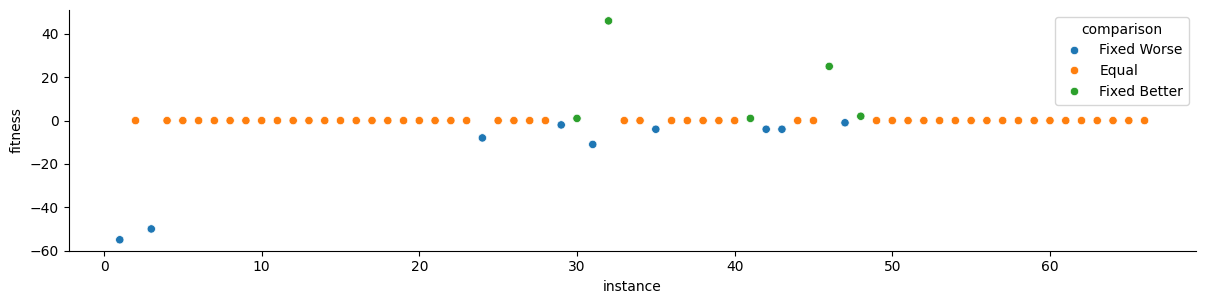

In [76]:
fg = sns.FacetGrid(data=concatenated, aspect=4)
sns.scatterplot(data=diff_df, x='instance', y='fitness', hue='comparison')

### Include Workers

[Text(0.5, 1.0, 'Overall Time Overview for all instances')]

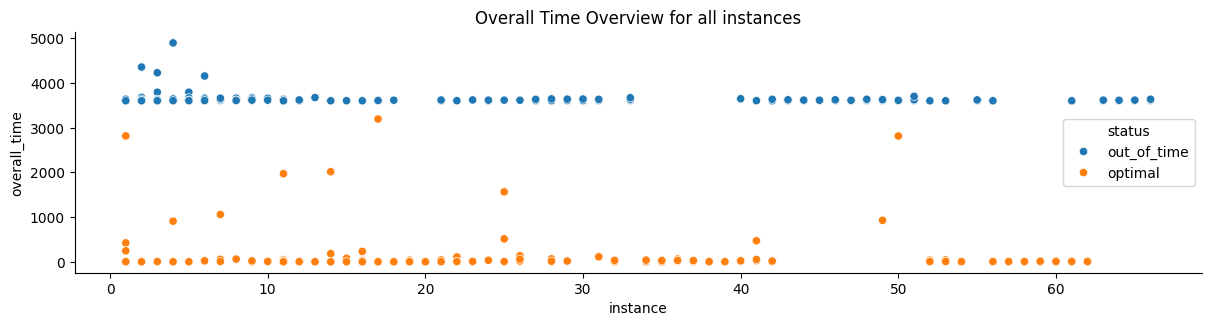

In [18]:
fg = sns.FacetGrid(data=concatenated, aspect=4)
sns.scatterplot(x='instance', y='overall_time', data=worker_df, hue='status').set(title='Overall Time Overview for all instances')

[Text(0.5, 1.0, 'Number of Solved & Unsolved Instances')]

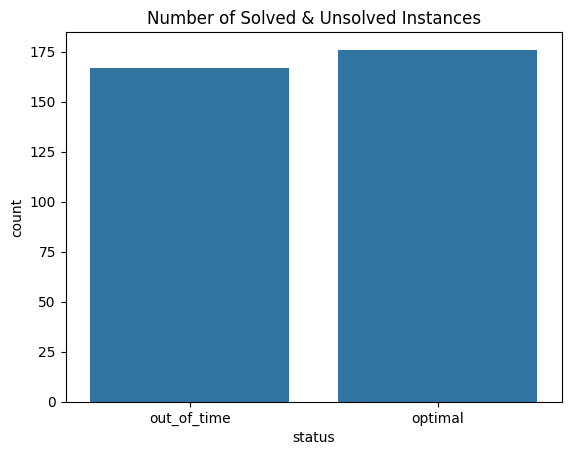

In [19]:
sns.countplot(data=worker_df, x='status').set(title='Number of Solved & Unsolved Instances')

[Text(0.5, 1.0, 'Number of Solved & Unsolved Instances for every Benchmark Source')]

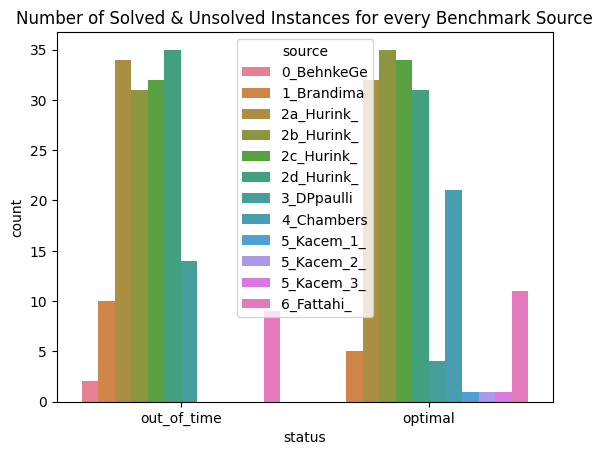

In [20]:
sns.countplot(data=worker_df, x='status', hue='source').set(title='Number of Solved & Unsolved Instances for every Benchmark Source')

[0.0, 0.3333333333333333, 0.48484848484848486, 0.5303030303030303, 0.5151515151515151, 0.4696969696969697, 0.2222222222222222, 1.0, 1.0, 0.55]


[Text(0.5, 1.0, 'Success Rate for every Benchmark Source')]

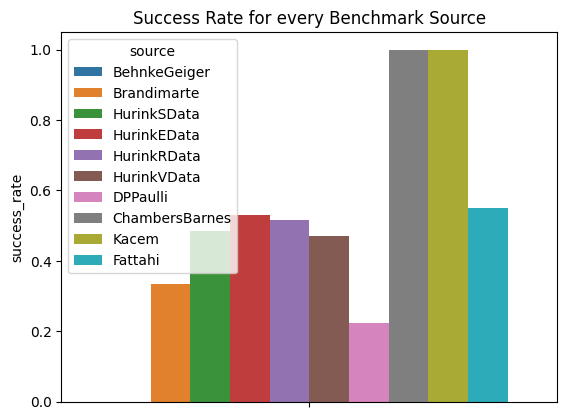

In [21]:
source_count = [0] * 10
success_count = [0] * 10
for index, row in worker_df.iterrows():
    idx = int(row['source'][0])
    if idx >= 2:
        if row['source'].startswith('2a'):
            idx = 2
        elif row['source'].startswith('2b'):
            idx = 3
        elif row['source'].startswith('2c'):
            idx = 4
        elif row['source'].startswith('2d'):
            idx = 5
        else:
            idx += 3
    source_count[idx] += 1
    if row['status'] == 'optimal':
        success_count[idx] += 1
success_rates = [success_count[i] / source_count[i] for i in range(len(source_count))]
print(success_rates)
plot_data = [
    {
        'source': 'BehnkeGeiger',
        'success_rate': success_rates[0]
    },
    {
        'source': 'Brandimarte',
        'success_rate': success_rates[1]
    },
    {
        'source': 'HurinkSData',
        'success_rate': success_rates[2]
    },
    {
        'source': 'HurinkEData',
        'success_rate': success_rates[3]
    },
    {
        'source': 'HurinkRData',
        'success_rate': success_rates[4]
    },
    {
        'source': 'HurinkVData',
        'success_rate': success_rates[5]
    },
    {
        'source': 'DPPaulli',
        'success_rate': success_rates[6]
    },
    {
        'source': 'ChambersBarnes',
        'success_rate': success_rates[7]
    },
    {
        'source': 'Kacem',
        'success_rate': success_rates[8]
    },
    {
        'source': 'Fattahi',
        'success_rate': success_rates[9]
    },
    
]
plot_df = pd.DataFrame(plot_data)
sns.barplot(data=plot_df, y='success_rate', hue='source').set(title='Success Rate for every Benchmark Source')

[0.0, 0.26666666666666666, 0.48484848484848486, 0.48484848484848486, 0.5151515151515151, 0.4393939393939394, 0.16666666666666666, 1.0, 0.5, 0.5]


[Text(0.5, 1.0, 'Success Rate for every Benchmark Source after 10 Minutes Runtime')]

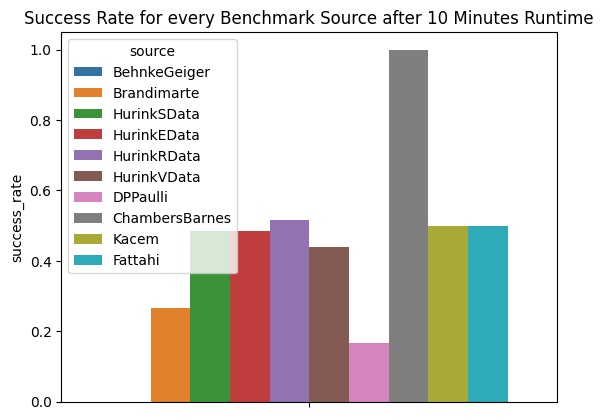

In [22]:
source_count = [0] * 10
success_count = [0] * 10
for index, row in worker_10_min_df.iterrows():
    idx = int(row['source'][0])
    if idx >= 2:
        if row['source'].startswith('2a'):
            idx = 2
        elif row['source'].startswith('2b'):
            idx = 3
        elif row['source'].startswith('2c'):
            idx = 4
        elif row['source'].startswith('2d'):
            idx = 5
        else:
            idx += 3
    source_count[idx] += 1
    if row['status'] == 'optimal':
        success_count[idx] += 1
success_rates = [success_count[i] / source_count[i] if source_count[i] > 0 else 0.0 for i in range(len(source_count))]
print(success_rates)
plot_data = [
    {
        'source': 'BehnkeGeiger',
        'success_rate': success_rates[0]
    },
    {
        'source': 'Brandimarte',
        'success_rate': success_rates[1]
    },
    {
        'source': 'HurinkSData',
        'success_rate': success_rates[2]
    },
    {
        'source': 'HurinkEData',
        'success_rate': success_rates[3]
    },
    {
        'source': 'HurinkRData',
        'success_rate': success_rates[4]
    },
    {
        'source': 'HurinkVData',
        'success_rate': success_rates[5]
    },
    {
        'source': 'DPPaulli',
        'success_rate': success_rates[6]
    },
    {
        'source': 'ChambersBarnes',
        'success_rate': success_rates[7]
    },
    {
        'source': 'Kacem',
        'success_rate': success_rates[8]
    },
    {
        'source': 'Fattahi',
        'success_rate': success_rates[9]
    },
    
]
plot_df = pd.DataFrame(plot_data)
sns.barplot(data=plot_df, y='success_rate', hue='source').set(title='Success Rate for every Benchmark Source after 10 Minutes Runtime')

[Text(0.5, 1.0, 'Overall Time for different Instance Sizes')]

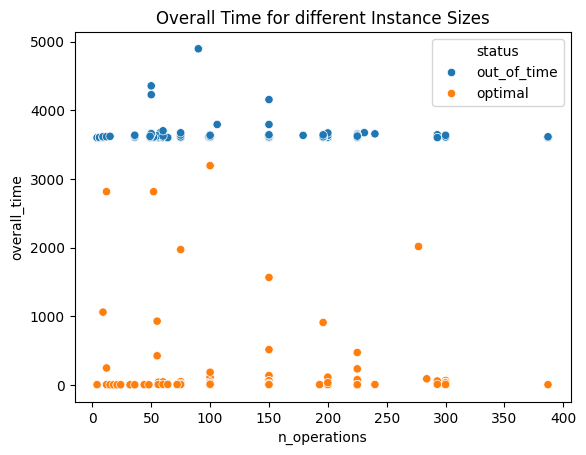

In [23]:
sns.scatterplot(x='n_operations', y='overall_time', data=worker_df, hue='status').set(title='Overall Time for different Instance Sizes')

<AxesSubplot: xlabel='n_operations', ylabel='overall_time'>

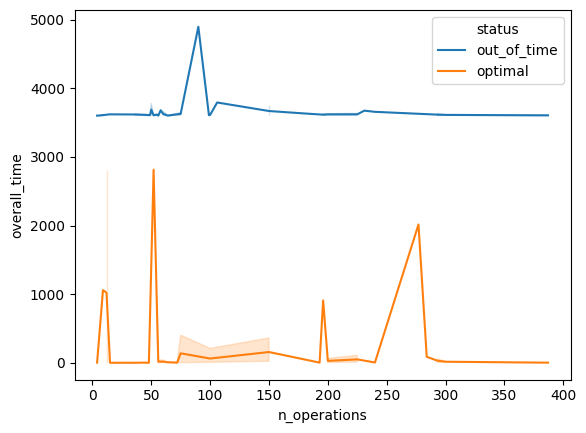

In [24]:
sns.lineplot(x='n_operations', y='overall_time', data=worker_df, hue='status')

<AxesSubplot: xlabel='n_operations', ylabel='optimization_time'>

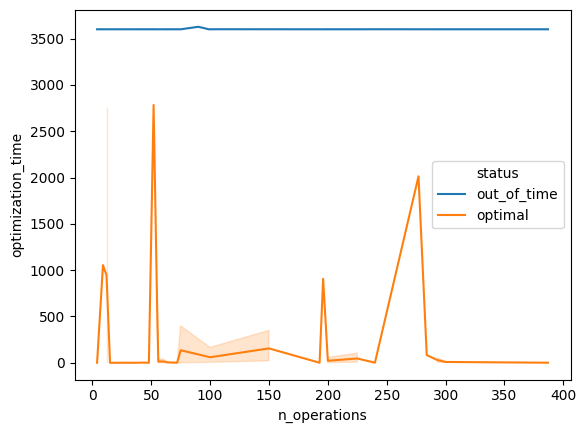

In [25]:
sns.lineplot(x='n_operations', y='optimization_time', data=worker_df, hue='status')

<AxesSubplot: xlabel='optimization_time', ylabel='beta_flexibility'>

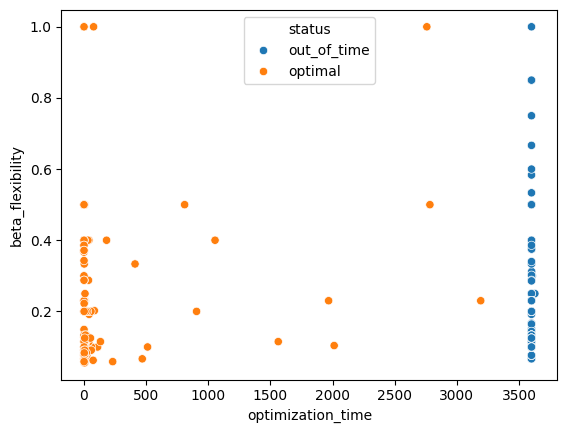

In [26]:
sns.scatterplot(x='optimization_time', y='beta_flexibility', data=worker_df, hue='status')

<AxesSubplot: xlabel='n_operations', ylabel='gap'>

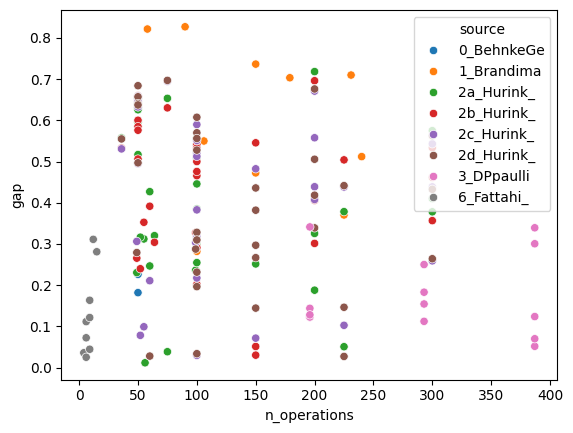

In [27]:
sns.scatterplot(x='n_operations', y='gap', data=worker_df.loc[(worker_df['status'] == 'out_of_time')], hue='source')

<AxesSubplot: xlabel='beta_flexibility', ylabel='gap'>

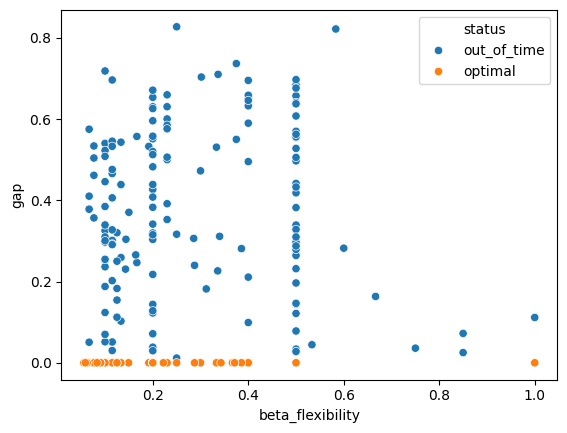

In [28]:
sns.scatterplot(x='beta_flexibility', y='gap', data=worker_df, hue='status')

<AxesSubplot: xlabel='beta_flexibility', ylabel='gap'>

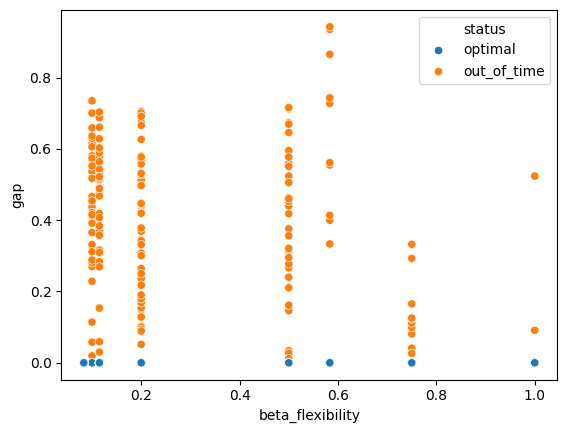

In [29]:
sns.scatterplot(x='beta_flexibility', y='gap', data=worker_10_min_df, hue='status')

In [30]:
worker_10_min_df.head()

,source,instance,fitness,ub,lb,gap,status,n_explored,optimization_time,overall_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility
0,1_Brandima,2,20,inf,0.0,0.000000,optimal,15161,490.071,508.195717,6,10,3.5,58,5.8,0.583333
1,1_Brandima,2,949,inf,0.0,0.865121,out_of_time,135,600.501,722.239299,6,10,3.5,58,5.8,0.583333
2,1_Brandima,2,2510,inf,0.0,0.941833,out_of_time,1,600.442,899.032073,6,10,3.5,58,5.8,0.583333
3,1_Brandima,2,2252,inf,0.0,0.935169,out_of_time,1,616.997,2574.012696,6,10,3.5,58,5.8,0.583333
4,1_Brandima,2,375,inf,0.0,0.554667,out_of_time,216,600.743,896.036527,6,10,3.5,58,5.8,0.583333


In [31]:
worker_df.head()

,source,instance,fitness,ub,lb,gap,status,n_explored,optimization_time,overall_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility
0,0_BehnkeGe,2,84,inf,0.0,0.226190,out_of_time,2664,3601.753,4355.722023,20,10,6.72,50,5.0,0.336000
1,0_BehnkeGe,3,88,inf,0.0,0.181818,out_of_time,3084,3601.501,4227.216257,20,10,6.24,50,5.0,0.312000
2,1_Brandima,1,20,inf,0.0,0.000000,optimal,15161,410.801,422.563966,6,10,2.00,55,5.5,0.333333
3,1_Brandima,2,723,inf,0.0,0.821580,out_of_time,3873,3600.277,3679.509608,6,10,3.50,58,5.8,0.583333
4,1_Brandima,3,554,inf,0.0,0.736462,out_of_time,3022,3600.769,3792.448230,8,15,3.00,150,10.0,0.375000
